In [289]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-risk-for-loan-approval/Loan.csv
/kaggle/input/financial-risk-for-loan-approval/CSV Generation.py


In [290]:
df=pd.read_csv('/kaggle/input/financial-risk-for-loan-approval/Loan.csv')

In [291]:
df



,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


<Axes: xlabel='LoanApproved', ylabel='AnnualIncome'>

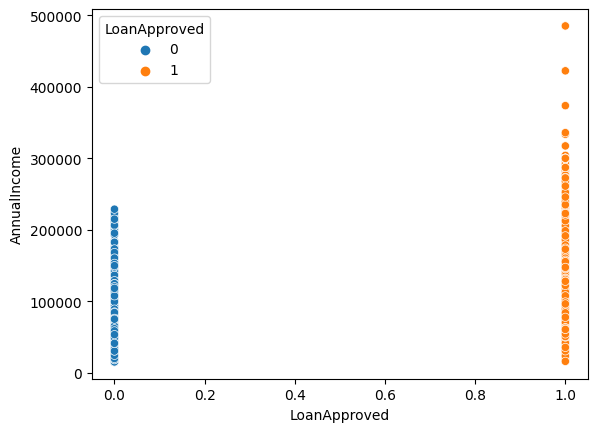

In [292]:
sns.scatterplot(y=df['AnnualIncome'],x=df['LoanApproved'],hue=df['LoanApproved'])
#if annual income is more than 2.5 lakh then Loan is mostly approved

<Axes: xlabel='LoanApproved', ylabel='NetWorth'>

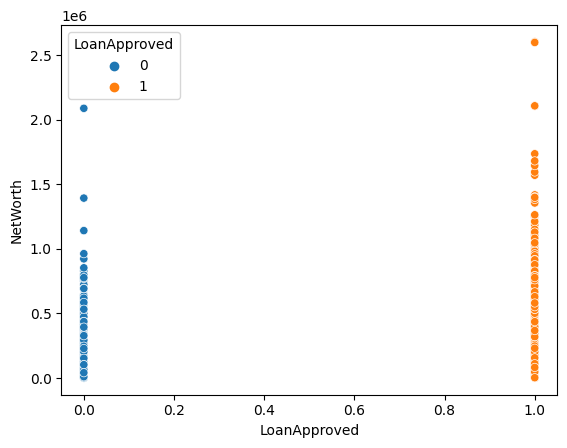

In [293]:
sns.scatterplot(y=df['NetWorth'],x=df['LoanApproved'],hue=df['LoanApproved'])

<Axes: xlabel='LoanApproved', ylabel='TotalDebtToIncomeRatio'>

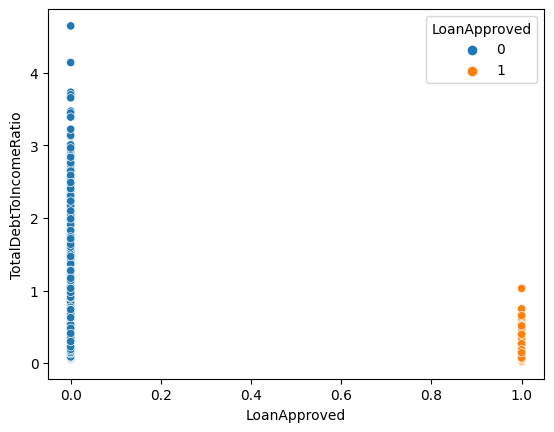

In [294]:
plt.gca().set_yticks(range(0, int(dummy_df['TotalDebtToIncomeRatio'].max()) + 1, 1))
sns.scatterplot(y=df['TotalDebtToIncomeRatio'],x=df['LoanApproved'],hue=df['LoanApproved'])


<Axes: xlabel='MaritalStatus', ylabel='LoanApproved'>

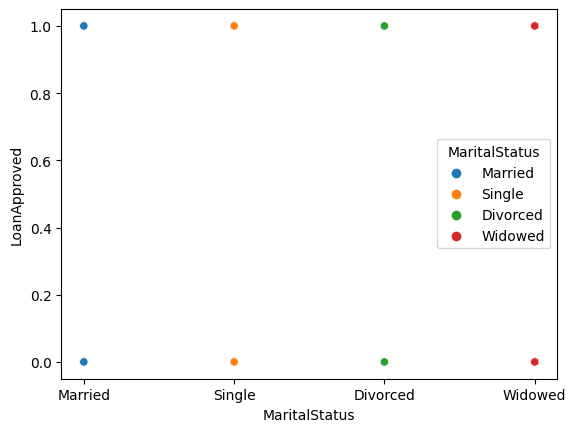

In [295]:
sns.scatterplot(x=df['MaritalStatus'],y=df['LoanApproved'],hue=df['MaritalStatus'])
#so loan approval does not depend on martial status we can drop the coloumn

In [321]:

columns_to_encode = ['MaritalStatus', 'EmploymentStatus', 'EducationLevel','MaritalStatus','HomeOwnershipStatus','LoanPurpose']

# Apply label encoding to multiple columns
for column in columns_to_encode:
    df[column] = df[column].astype('category').cat.codes


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  int8   
 5   EducationLevel              20000 non-null  int8   
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  int8   
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  int8   
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [324]:
df = df.drop(['ApplicationDate','marital_status_encoded'], axis=1)

In [325]:
df

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,0,4,22,13152,48,1,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,0,0,15,26045,48,2,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,0,1,26,17627,36,1,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,0,3,34,37898,96,2,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,0,0,17,9184,36,1,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,0,3,19,24521,36,1,3,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,56,49246,567,0,0,33,25818,36,1,5,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,44,48958,645,0,1,20,37033,72,1,3,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,60,41025,560,0,3,36,14760,72,1,3,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int8   
 4   EducationLevel              20000 non-null  int8   
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  int8   
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int8   
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [303]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [327]:
features=[x for x in df.columns if x not in ('LoanApproved')]
features

['Age',
 'AnnualIncome',
 'CreditScore',
 'EmploymentStatus',
 'EducationLevel',
 'Experience',
 'LoanAmount',
 'LoanDuration',
 'MaritalStatus',
 'NumberOfDependents',
 'HomeOwnershipStatus',
 'MonthlyDebtPayments',
 'CreditCardUtilizationRate',
 'NumberOfOpenCreditLines',
 'NumberOfCreditInquiries',
 'DebtToIncomeRatio',
 'BankruptcyHistory',
 'LoanPurpose',
 'PreviousLoanDefaults',
 'PaymentHistory',
 'LengthOfCreditHistory',
 'SavingsAccountBalance',
 'CheckingAccountBalance',
 'TotalAssets',
 'TotalLiabilities',
 'MonthlyIncome',
 'UtilityBillsPaymentHistory',
 'JobTenure',
 'NetWorth',
 'BaseInterestRate',
 'InterestRate',
 'MonthlyLoanPayment',
 'TotalDebtToIncomeRatio',
 'RiskScore']

In [328]:
import numpy as np
Loan_prediction=df[["LoanApproved"]]
Loan_prediction_array = Loan_prediction.values.flatten()  


In [329]:
X_train,X_test,Y_train,Y_test=train_test_split(df[features],Loan_prediction_array,test_size=0.3)

In [330]:
X_train

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
4593,18,33514,586,1,0,0,44971,36,2,4,...,33459,2792.833333,0.966542,6,6646,0.236971,0.270909,1838.145166,0.994741,57.0
15285,22,18279,536,0,1,0,33224,72,2,1,...,14820,1523.250000,0.682045,5,113478,0.280224,0.224179,843.052062,0.723487,51.0
2874,39,41429,571,0,3,14,10924,96,1,1,...,4596,3452.416667,0.614714,4,124592,0.260424,0.299094,300.557400,0.240573,54.0
9305,51,61156,623,0,1,26,15364,48,2,0,...,91869,5096.333333,0.527165,5,121207,0.198864,0.172855,445.601716,0.223416,36.8
16905,59,59741,656,1,0,37,24160,60,1,0,...,1010,4978.416667,0.778839,3,106205,0.201160,0.213076,657.796849,0.168888,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,36,127578,595,0,1,14,24135,84,1,1,...,8693,10631.500000,0.892621,7,2081,0.251635,0.261113,628.149062,0.132168,40.0
5844,48,38611,567,0,3,24,6977,96,1,1,...,62170,3217.583333,0.912854,3,560778,0.258477,0.275963,180.836374,0.184249,35.2
1414,32,15000,565,0,3,12,15971,48,1,0,...,19542,1250.000000,0.820148,3,103215,0.228471,0.247444,527.278539,1.293823,52.0
13539,35,80339,572,0,1,16,16184,12,1,1,...,10059,6694.916667,0.762462,3,225902,0.195184,0.156147,1465.439120,0.260562,40.0


In [355]:
model =XGBClassifier(n_estimators=100, learning_rate=0.65, subsample=0.8, min_child_weight=2)
model.fit(X_train,Y_train)
predictions_train=model.predict(X_train)
predictions_test=model.predict(X_test)
train_accuracy=accuracy_score(predictions_train,Y_train)
test_accuracy=accuracy_score(predictions_test,Y_test)


In [356]:
Y_test = np.array(Y_test)
Y_test_predictions = np.array(predictions_test)
Y_train = np.array(Y_train)
Y_train_predictions = np.array(predictions_train)
test_accuracy = np.sum(Y_test == Y_test_predictions) / len(Y_test)
train_accuracy=np.sum(Y_train==Y_train_predictions)/ len(Y_train)

In [357]:
print(test_accuracy*100,train_accuracy*100)

99.85000000000001 100.0
